# How to recognise ironic tone in your voice?
#### based on Valerio Velardo - The Sound of AI recognision music genre project

### playing sound function

In [3]:
import sounddevice as sd
import soundfile as sf
import numpy as np

filename = 'ironicznie12.wav'
# Extract data and sampling rate from file
data, fs = sf.read(filename, dtype='float32')  
sd.play(data, fs)
status = sd.wait()  # Wait until file is done playing

### recording sound function

In [4]:
from scipy.io.wavfile import write

def Nagrywaj(filename,sec):
    
    fs = 44100  # Sample rate
    seconds = sec  # Duration of recording

    myrecording = sd.rec(int(seconds * fs), samplerate=fs, channels=2)
    sd.wait()  # Wait until recording is finished
    write(filename+'.wav', fs, myrecording)  # Save as WAV file 


In [39]:
### Recording multiple sound 
k='yes'
i=0
while(k!='no'):
    k=input('do u want to record')
    if k=='no':
        pass
#         file_path='ironic'+'.wav'
    else:
        i=i+1
        print('go on')
        Nagrywaj('ironic'+str(i),3)



do u want to recordyes
go on
do u want to recordno


# Reducing noise ( wait 1 s before you speak) 
#### credits to https://timsainburg.com/noise-reduction-python.html

In [20]:
import noisereduce as nr
import IPython
from scipy.io import wavfile
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
import librosa
%matplotlib inline
    

def Odszumianie(sig):
    rate, data1 = wavfile.read(wav_loc)
    data1 = data1 / 32768
    data1 = data1[:,1]
    noisy_part = data1[10000:50000]
    # perform noise reduction
#     reduced_noise = nr.reduce_noise(audio_clip=data1, noise_clip=noisy_part, verbose=True) # wersja z wykresami
    noise_reduced = nr.reduce_noise(audio_clip=data1.astype('float32'),
                                noise_clip=noisy_part.astype('float32'),
                                use_tensorflow=True, 
                                verbose=False)
#     librosa.output.write_wav('odszumione'+sig, reduced_noise,rate)
    return noise_reduced

In [6]:
wav_loc = 'szum1.wav'

rate, data1 = wavfile.read(wav_loc)
data1 = data1 / 32768
data1 = data1[:,1]

IPython.display.Audio(data=data1, rate=rate)


In [13]:
IPython.display.Audio(data=Odszumianie('szum1.wav'), rate=rate)


In [21]:
Odszumianie('szum1.wav')

array([0.0000000e+00, 2.9451197e-18, 6.8661682e-18, ..., 1.2765731e-08,
       2.9372909e-08, 5.0619768e-08], dtype=float32)

# I dont know why it is not working yet

In [27]:
IPython.display.Audio(data='odszumioneszum1.wav', rate=rate)
# sf.write('odszumioneszum1.wav',Odszumianie('szum1.wav'), 44100, 'PCM_24') 

In [28]:
import json
import os
import math
import librosa

DATASET_PATH = "ironia"
JSON_PATH = "ironia.json"
SAMPLE_RATE = 22050
TRACK_DURATION = 3 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from dataset and saves them into a json file along witgh labels.
        :param num_mfcc (int): Number of coefficients to extract
        :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
        :param hop_length (int): Sliding window for FFT. Measured in # of samples
        :param: num_segments (int): Number of segments we want to divide sample tracks into
        :return:
        """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing sub-folder level
        if dirpath is not dataset_path:

            # save label (i.e., sub-folder name) in the mapping
            semantic_label = dirpath.split("\\")[-1] 
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in sub-dir
            for f in filenames:

            # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)

                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)


Processing: ironic
ironia\ironic\ironicznie0.wav, segment:1
ironia\ironic\ironicznie0.wav, segment:2
ironia\ironic\ironicznie0.wav, segment:3
ironia\ironic\ironicznie0.wav, segment:4
ironia\ironic\ironicznie0.wav, segment:5
ironia\ironic\ironicznie0.wav, segment:6
ironia\ironic\ironicznie0.wav, segment:7
ironia\ironic\ironicznie0.wav, segment:8
ironia\ironic\ironicznie0.wav, segment:9
ironia\ironic\ironicznie0.wav, segment:10
ironia\ironic\ironicznie1.wav, segment:1
ironia\ironic\ironicznie1.wav, segment:2
ironia\ironic\ironicznie1.wav, segment:3
ironia\ironic\ironicznie1.wav, segment:4
ironia\ironic\ironicznie1.wav, segment:5
ironia\ironic\ironicznie1.wav, segment:6
ironia\ironic\ironicznie1.wav, segment:7
ironia\ironic\ironicznie1.wav, segment:8
ironia\ironic\ironicznie1.wav, segment:9
ironia\ironic\ironicznie1.wav, segment:10
ironia\ironic\ironicznie10.wav, segment:1
ironia\ironic\ironicznie10.wav, segment:2
ironia\ironic\ironicznie10.wav, segment:3
ironia\ironic\ironicznie10.wav, 

ironia\nonironic\non0.wav, segment:1
ironia\nonironic\non0.wav, segment:2
ironia\nonironic\non0.wav, segment:3
ironia\nonironic\non0.wav, segment:4
ironia\nonironic\non0.wav, segment:5
ironia\nonironic\non0.wav, segment:6
ironia\nonironic\non0.wav, segment:7
ironia\nonironic\non0.wav, segment:8
ironia\nonironic\non0.wav, segment:9
ironia\nonironic\non0.wav, segment:10
ironia\nonironic\non1.wav, segment:1
ironia\nonironic\non1.wav, segment:2
ironia\nonironic\non1.wav, segment:3
ironia\nonironic\non1.wav, segment:4
ironia\nonironic\non1.wav, segment:5
ironia\nonironic\non1.wav, segment:6
ironia\nonironic\non1.wav, segment:7
ironia\nonironic\non1.wav, segment:8
ironia\nonironic\non1.wav, segment:9
ironia\nonironic\non1.wav, segment:10
ironia\nonironic\non10.wav, segment:1
ironia\nonironic\non10.wav, segment:2
ironia\nonironic\non10.wav, segment:3
ironia\nonironic\non10.wav, segment:4
ironia\nonironic\non10.wav, segment:5
ironia\nonironic\non10.wav, segment:6
ironia\nonironic\non10.wav, se

In [29]:
#load data
import json
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
DATASET_PATH="ironia.json"

def load_data(dataset_path):
    with open(dataset_path,"r") as fp:
        data = json.load(fp)
        #convert lists into arrays
        inputs = np.array(data['mfcc'])
        targets = np.array(data['labels'])
        
        return inputs,targets

In [30]:
from keras.backend import clear_session
clear_session()


if __name__ == "__main__":

    inputs,targets = load_data('ironia.json')
    X_train , X_test , y_train, y_test = train_test_split(inputs,targets,test_size=0.3)

    model1 = keras.Sequential([
        #input layer 
        keras.layers.Flatten(input_shape=(inputs.shape[1],inputs.shape[2])), #bierze mulidemensional layer i go layeruje
        # 1st hiden layer
        keras.layers.Dense(512,activation="relu"),
                # 2st hiden layer
        keras.layers.Dense(256,activation="relu"),
                # 3st hiden layer
        keras.layers.Dense(56,activation="relu"),
                # ooutput layer
        keras.layers.Dense(2,activation='softmax')
    ])

    optimizer = keras.optimizers.Adam(learning_rate = 0.0001)
    model1.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])

    model1.summary
    
    #train network
    history=model1.fit(X_train,y_train,
              validation_data=(X_test,y_test),
              epochs=50,
              batch_size=32)

Epoch 1/50
9/9 [==============================] - 2s 236ms/step - loss: 17.4169 - accuracy: 0.4536 - val_loss: 6.6095 - val_accuracy: 0.4083
Epoch 2/50
9/9 [==============================] - 0s 21ms/step - loss: 5.4760 - accuracy: 0.5214 - val_loss: 3.8634 - val_accuracy: 0.3833
Epoch 3/50
9/9 [==============================] - 0s 23ms/step - loss: 3.4025 - accuracy: 0.5036 - val_loss: 2.8782 - val_accuracy: 0.4750
Epoch 4/50
9/9 [==============================] - 0s 22ms/step - loss: 2.4906 - accuracy: 0.5429 - val_loss: 2.3266 - val_accuracy: 0.4333
Epoch 5/50
9/9 [==============================] - 0s 23ms/step - loss: 1.9795 - accuracy: 0.5286 - val_loss: 1.8943 - val_accuracy: 0.5250
Epoch 6/50
9/9 [==============================] - 0s 24ms/step - loss: 1.5694 - accuracy: 0.6071 - val_loss: 1.5926 - val_accuracy: 0.5000
Epoch 7/50
9/9 [==============================] - 0s 22ms/step - loss: 1.7244 - accuracy: 0.6000 - val_loss: 1.5536 - val_accuracy: 0.5667
Epoch 8/50
9/9 [=========

## There are different types of Gradient Descent
### Stochastic Gradient Descent
### Batch Gradient Descent
### Mini-Batch Gradient Descent

https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/

In [31]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 169)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               87040     
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 56)                14392     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 114       
Total params: 232,874
Trainable params: 232,874
Non-trainable params: 0
_________________________________________________________________


In [32]:
loss, accuracy = model1.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model1.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))

Training Accuracy: 0.8643
Testing Accuracy:  0.6583


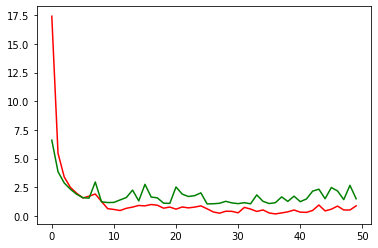

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r',  
history.history['val_loss'], 'g')

In [34]:
def predict(model,X,y):
    X=X[np.newaxis,...]
    
    #prediction = [ [0.1,0.2,0.3] ]
    prediction = model.predict(X)
    
    #extract index with max values
    predicted_index = np.argmax(prediction,axis=1) 
    print('expected index :{} , predicted index: {}'.format(y,predicted_index))

In [35]:
X=X_test[98]
y=y_test[98]
predict(model1,X,y)

expected index :1 , predicted index: [0]


## so , for now our network works pretty well
# Now let's try CNN 

In [36]:
from sklearn.model_selection import train_test_split
def prepare_dataset(test_size,validation_size):
    #load data
    X,y = load_data(DATASET_PATH)
    
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = test_size)
    
    X_train,X_validation,y_train,y_validation = train_test_split(X_train,y_train,test_size=validation_size)
    # CNN needs 3D array
    #3d ARRAY -> (130 , 13 , 1)
    X_train = X_train[...,np.newaxis] # 4d array -> (NUM_SAMPLES,130,13,1)
    X_validation = X_validation[...,np.newaxis] 
    X_test = X_test[...,np.newaxis] 
    
    return X_train,X_validation,X_test,y_train,y_validation,y_test

In [37]:
def build_model(input_shape1):
    #create model
    model = keras.Sequential()
    #1st conv layer
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape1))
    model.add(keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    #2st conv layer
    model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=input_shape1))
    model.add(keras.layers.MaxPool2D((3,3),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())
    
    #3st conv layer
    model.add(keras.layers.Conv2D(32,(2,2),activation='relu',input_shape=input_shape1))
    model.add(keras.layers.MaxPool2D((2,2),strides=(2,2),padding='same'))
    model.add(keras.layers.BatchNormalization())
    #flatten 
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64,activation='relu'))
    model.add(keras.layers.Dropout(0.3))
        #ooutput
    model.add(keras.layers.Dense(2,activation='softmax'))
    
    return model

In [38]:
if __name__ == '__main__':
    #train validation test
    X_train,X_validation,X_test,y_train,y_validation,y_test = prepare_dataset(0.3,0.2)
    
    #budujemy siec
    input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])
    model = build_model(input_shape)
    #skompiluj siec
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer,
                 loss='sparse_categorical_crossentropy',
                  metrics=['accuracy']
                 )
    
    #train CNN
    model.fit(X_train,y_train , validation_data=(X_validation,y_validation),batch_size=32,epochs=30)
    #evaluate
    test_error,test_accuracy= model.evaluate(X_test,y_test,verbose=1)
    print("acc on test is {}".format(test_accuracy))
     #make predictions

Epoch 1/30
7/7 [==============================] - 1s 108ms/step - loss: 0.8921 - accuracy: 0.5223 - val_loss: 0.9290 - val_accuracy: 0.4286
Epoch 2/30
7/7 [==============================] - 0s 35ms/step - loss: 0.8236 - accuracy: 0.4911 - val_loss: 0.8351 - val_accuracy: 0.4286
Epoch 3/30
7/7 [==============================] - 0s 39ms/step - loss: 0.8256 - accuracy: 0.5268 - val_loss: 0.8003 - val_accuracy: 0.4286
Epoch 4/30
7/7 [==============================] - 0s 38ms/step - loss: 0.8321 - accuracy: 0.4911 - val_loss: 0.7773 - val_accuracy: 0.4286
Epoch 5/30
7/7 [==============================] - 0s 38ms/step - loss: 0.7928 - accuracy: 0.5179 - val_loss: 0.7701 - val_accuracy: 0.4286
Epoch 6/30
7/7 [==============================] - 0s 37ms/step - loss: 0.7545 - accuracy: 0.5804 - val_loss: 0.7652 - val_accuracy: 0.4286
Epoch 7/30
7/7 [==============================] - 0s 38ms/step - loss: 0.7734 - accuracy: 0.5402 - val_loss: 0.7618 - val_accuracy: 0.4464
Epoch 8/30
7/7 [==========

Training Accuracy: 0.6652
Testing Accuracy:  0.5250


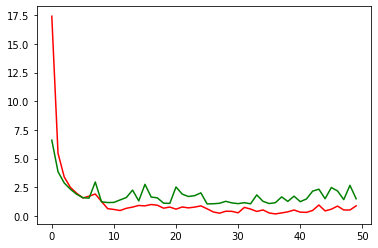

In [39]:
loss, accuracy = model.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plt.plot(history.history['loss'], 'r',  
history.history['val_loss'], 'g')

In [40]:
def predictnew(model,X):
    X=X[np.newaxis,...]
    
    #prediction = [ [0.1,0.2,0.3] ]
    prediction = model.predict(X)
    
    #extract index with max values
    predicted_index = np.argmax(prediction,axis=1) 
    print(' predicted index: {}'.format(predicted_index))

In [41]:
k='yes'
i=0
while(k!='no'):
    k=input('do you want ot record new one?')
    if k=='no':
        pass
        file_path='ironicznie'+'.wav'
    else:
        print('then go on')
        Nagrywaj('ironicznie',3)




# file_path='nieironiaproba.wav' # those were just for checking and it works
# file_path='ironicznie12.wav'
# print('rozkminiam'+file_path)

SAMPLE_RATE = 22050
TRACK_DURATION = 3 # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION
num_mfcc=13 
n_fft=2048 
hop_length=512 
num_segments=10
signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)
    
# process all segments of audio file
for d in range(num_segments):

    # calculate start and finish sample for current segment
    start = samples_per_segment * d
    finish = start + samples_per_segment

                    # extract mfcc
    mfcc = librosa.feature.mfcc(signal[start:finish], sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
    mfcc = mfcc.T
    data=[]
                    # store only mfcc feature with expected number of vectors
    if len(mfcc) == num_mfcc_vectors_per_segment:
        data.append(mfcc.tolist())
                    
input1 = np.array(data)
X=input1[0]
predictnew(model1,X)

do you want ot record new one?yes
then go on
do you want ot record new one?no
 predicted index: [0]


### 1 is labeled as nonironic
### 0 is labeled as ironic